**Useful Imports**

In [10]:
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import csv

**Variable Declaration**

In [11]:
INFO = 1 # For debugging

# Change path to find nifti files on local computer
data = []
with open('scans.csv', newline='') as scanfile:
    reader = csv.DictReader(scanfile)
    for row in reader:
        dataRow = [ row['file_name'], float(row['rg_value']), [], 0, 0, 0, 0 ]
        data.append(dataRow)

**Extract Images**

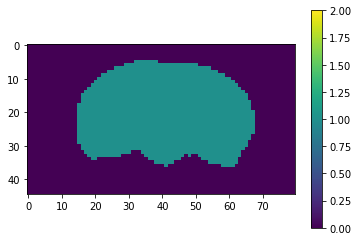

In [12]:
idx = 0
for d in data:
    data[idx][2] = np.asarray(nb.load(d[0]).dataobj)
    idx += 1
    
mask = np.asarray(nb.load(("/home/cedric/Documents/Capstone/CapstoneProject/output/masks/PDw_mask.nii.gz")).dataobj)
fig = plt.figure(1)
pos = plt.imshow(np.rot90(mask[:, 40, :]), vmax=2, vmin=0)
plt.colorbar(pos)
plt.show()

**Average Images**

In [13]:
# Average out the scans with the same RG values
avgData = [ [ 101, np.zeros(data[0][2].shape), 0, [], [], [], 0 ], [ 50.8, np.zeros(data[0][2].shape), 0, [], [], [], 0 ],
                [ 64, np.zeros(data[0][2].shape), 0, [], [], [], 0 ], [ 71.8, np.zeros(data[0][2].shape), 0, [], [], [], 0 ],
                [ 80.6, np.zeros(data[0][2].shape), 0, [], [], [], 0 ], [ 90.5, np.zeros(data[0][2].shape), 0, [], [], [], 0 ] ]
        # Can add more elements to the array for the other possible RG gain values that we encounter
means = [[101, 0, 0], [50.8, 0, 0], [64, 0, 0], [71.8, 0, 0], [80.6, 0, 0], [90.5, 0, 0],]

for d in data:
    if( d[1] == 101.0 ):
        avgData[0][1] = np.add(avgData[0][1], d[2])
        avgData[0][2] += 1
        # Store latest header and affine for RG
        avgData[0][3] = d[3]
        avgData[0][4] = d[4]
    elif( d[1] == 50.8 ):
        avgData[1][1] = np.add(avgData[1][1], d[2])
        avgData[1][2] += 1
        # Store latest header and affine for RG
        avgData[1][3] = d[3]
        avgData[1][4] = d[4]
    elif( d[1] == 64 ):
        avgData[2][1] = np.add(avgData[2][1], d[2])
        avgData[2][2] += 1
        # Store latest header and affine for RG
        avgData[2][3] = d[3]
        avgData[2][4] = d[4]
    elif( d[1] == 71.8 ):
        avgData[3][1] = np.add(avgData[3][1], d[2])
        avgData[3][2] += 1
        # Store latest header and affine for RG
        avgData[3][3] = d[3]
        avgData[3][4] = d[4]
    elif( d[1] == 80.6 ):
        avgData[4][1] = np.add(avgData[4][1], d[2])
        avgData[4][2] += 1
        # Store latest header and affine for RG
        avgData[4][3] = d[3]
        avgData[4][4] = d[4]
    elif( d[1] == 90.5 ):
        avgData[5][1] = np.add(avgData[5][1], d[2])
        avgData[5][2] += 1
        # Store latest header and affine for RG
        avgData[5][3] = d[3]
        avgData[5][4] = d[4]

idx = 0
for rg in avgData:
    avgData[idx][1] = rg[1]/rg[2]
    means[idx][2] = np.mean(avgData[idx][1])
    avgData[idx][1] = np.multiply(avgData[idx][1], mask)
    idx += 1



**Plot Images**

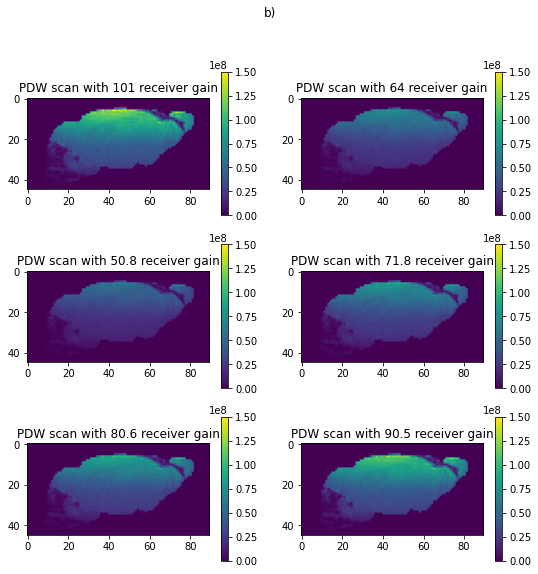

In [14]:
slice = 45 # Adjust this to change slice plotted

# Print preview of 4 scans with the various receiver gain
fig, frame = plt.subplots(3, 2, figsize=(9,9))
z1 = np.rot90(avgData[0][1][slice,:,:])
pos1 = frame[0, 0].imshow(z1, vmax=1.5e8, vmin=0)
frame[0, 0].set_title("PDW scan with {} receiver gain".format(avgData[0][0]))
fig.colorbar(pos1, ax=frame[0,0])

z2 = np.rot90(avgData[1][1][slice,:,:])
pos2 = frame[1, 0].imshow(z2, vmax=1.5e8, vmin=0)
frame[1, 0].set_title("PDW scan with {} receiver gain".format(avgData[1][0]))
fig.colorbar(pos2, ax=frame[1,0])

z3 = np.rot90(avgData[2][1][slice,:,:])
pos3 = frame[0, 1].imshow(z3, vmax=1.5e8, vmin=0)
frame[0, 1].set_title("PDW scan with {} receiver gain".format(avgData[2][0]))
fig.colorbar(pos3, ax=frame[0,1])

z4 = np.rot90(avgData[3][1][slice,:,:])
pos4= frame[1, 1].imshow(z4, vmax=1.5e8, vmin=0)
frame[1, 1].set_title("PDW scan with {} receiver gain".format(avgData[3][0]))
fig.colorbar(pos4, ax=frame[1,1])

z5 = np.rot90(avgData[4][1][slice,:,:])
pos5= frame[2, 0].imshow(z5, vmax=1.5e8, vmin=0)
frame[2, 0].set_title("PDW scan with {} receiver gain".format(avgData[4][0]))
fig.colorbar(pos5, ax=frame[2,0])

z6 = np.rot90(avgData[5][1][slice,:,:])
pos6= frame[2, 1].imshow(z6, vmax=1.5e8, vmin=0)
frame[2, 1].set_title("PDW scan with {} receiver gain".format(avgData[5][0]))
fig.colorbar(pos6, ax=frame[2,1])

fig.suptitle("b)")
plt.savefig("/home/cedric/Documents/Capstone/MidProjectReport/figure5b.jpg")
# plt.show()

In [15]:
# means = [[101, 0, 0], [50.8, 0, 0], [64, 0, 0], [71.8, 0, 0], [80.6, 0, 0], [90.5, 0, 0],]

idx = 0
for d in avgData:
    means[idx][1] = np.mean(avgData[idx][1][mask.astype(bool)])
    idx = idx + 1
print(means)

[[101, 50708706.09289042, 26105622.191535734], [50.8, 23480373.740342338, 12097483.76938149], [64, 29518604.520110678, 15244791.996849323], [71.8, 33015203.84057108, 17112428.03590796], [80.6, 37136779.5755572, 19274776.3484148], [90.5, 46228339.452447385, 24043130.048201963]]


In [16]:
maskedratios = [[50.8, 0, 101/50.8, '101/50.8'], [64, 0, 101/64, '101/64'], [71.8, 0, 101/71.8, "101/71.8"], [80.6, 0, 101/80.6, "101/80.6"], [90.5, 0, 101/90.5, "101/90.5"]]
notmaskedratios = [[50.8, 0], [64, 0], [71.8, 0], [80.6, 0], [90.5, 0]]
y = [0, 0, 0, 0, 0]
x = ['', '', '', '', '']
idx = 0
for f in maskedratios:
    maskedratios[idx][1] = means[0][1]/means[idx+1][1]
    notmaskedratios[idx][1] = means[0][2]/means[idx+1][2]
    y[idx] = maskedratios[idx][1]/maskedratios[idx][2]
    x[idx] = maskedratios[idx][3]
    idx = idx + 1
print(maskedratios)
print(notmaskedratios)

[[50.8, 2.1596209095158594, 1.9881889763779528, '101/50.8'], [64, 1.7178558037302603, 1.578125, '101/64'], [71.8, 1.5359198246286911, 1.4066852367688023, '101/71.8'], [80.6, 1.3654578203185401, 1.2531017369727049, '101/80.6'], [90.5, 1.0969181825155487, 1.1160220994475138, '101/90.5']]
[[50.8, 2.1579381869152483], [64, 1.7124288869884905], [71.8, 1.5255358349356885], [80.6, 1.354393001487808], [90.5, 1.0857830132432367]]


In [17]:
print(x)
print(y)

['101/50.8', '101/64', '101/71.8', '101/80.6', '101/90.5']
[1.086225170330749, 1.0885422914726401, 1.0918717169142576, 1.089662379382914, 0.9828821338381897]


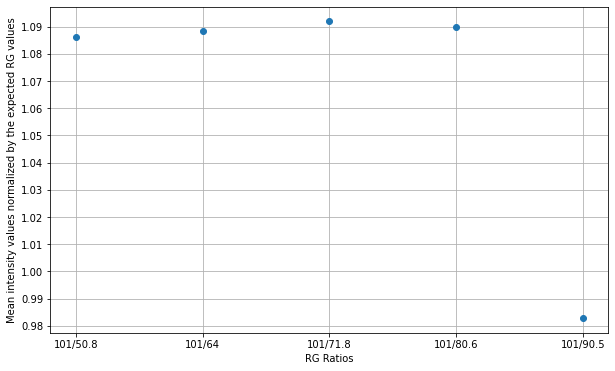

In [19]:
fig = plt.figure(3, figsize=(10, 6))
xscale = np.array([0, 1, 2, 3, 4])
plt.yticks(np.arange(0.95, 1.1, 0.01))
plt.xticks(xscale, x)
p = plt.plot(x, y, marker='o', linestyle="None")
plt.xlabel("RG Ratios")
plt.ylabel("Mean intensity values normalized by the expected RG values")
plt.grid()
# plt.xticks(np.arange(1.1, 2.1, 0.05))
plt.savefig("/home/cedric/Documents/Capstone/MidProjectReport/figure6.jpg")

In [28]:
ratioed_images = [['101/50.8', np.divide(avgData[0][1], avgData[1][1], out=np.zeros_like(avgData[0][1]), where=avgData[1][1]!=0)], 
                  ['101/64', np.divide(avgData[0][1], avgData[2][1], out=np.zeros_like(avgData[0][1]), where=avgData[2][1]!=0)], 
                  ['101/71.8', np.divide(avgData[0][1], avgData[3][1], out=np.zeros_like(avgData[0][1]), where=avgData[3][1]!=0)], 
                  ['101/80.6', np.divide(avgData[0][1], avgData[4][1], out=np.zeros_like(avgData[0][1]), where=avgData[4][1]!=0)], 
                  ['101/90.5', np.divide(avgData[0][1], avgData[5][1], out=np.zeros_like(avgData[0][1]), where=avgData[5][1]!=0)]]

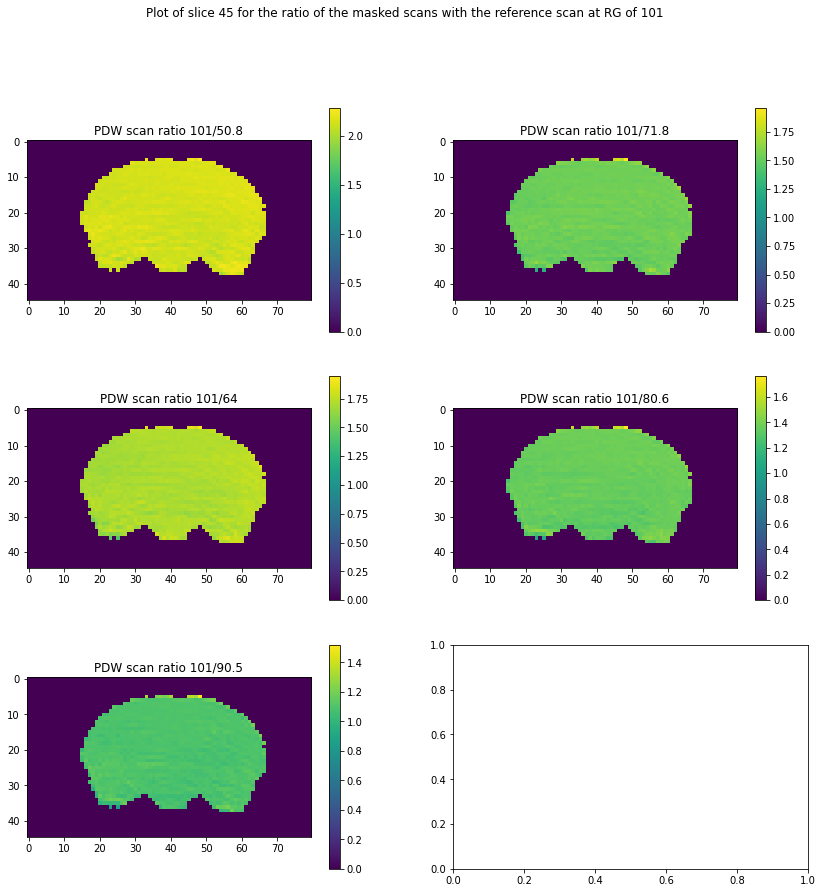

In [36]:
slice = 45 # Adjust this to change slice plotted

# Print preview of 4 scans with the various receiver gain
fig, frame = plt.subplots(3, 2, figsize=(14,14))
z1 = np.rot90(ratioed_images[0][1][:,slice,:])
pos1 = frame[0, 0].imshow(z1)
frame[0, 0].set_title("PDW scan ratio {}".format(ratioed_images[0][0]))
fig.colorbar(pos1, ax=frame[0,0])

z2 = np.rot90(ratioed_images[1][1][:,slice,:])
pos2 = frame[1, 0].imshow(z2)
frame[1, 0].set_title("PDW scan ratio {}".format(ratioed_images[1][0]))
fig.colorbar(pos2, ax=frame[1,0])

z3 = np.rot90(ratioed_images[2][1][:,slice,:])
pos3 = frame[0, 1].imshow(z3)
frame[0, 1].set_title("PDW scan ratio {}".format(ratioed_images[2][0]))
fig.colorbar(pos3, ax=frame[0,1])

z4 = np.rot90(ratioed_images[3][1][:,slice,:])
pos4= frame[1, 1].imshow(z4)
frame[1, 1].set_title("PDW scan ratio {}".format(ratioed_images[3][0]))
fig.colorbar(pos4, ax=frame[1,1])

z5 = np.rot90(ratioed_images[4][1][:,slice,:])
pos5= frame[2, 0].imshow(z5)
frame[2, 0].set_title("PDW scan ratio {}".format(ratioed_images[4][0]))
fig.colorbar(pos5, ax=frame[2,0])

fig.suptitle("Plot of slice " + str(slice) + " for the ratio of the masked scans with the reference scan at RG of 101")
plt.savefig("/home/cedric/Documents/Capstone/MallarPresentation/ratioed_masked_data.jpg")
#plt.show()